# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



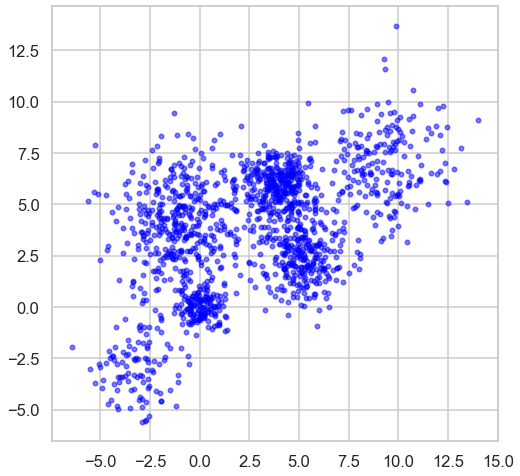

In [7]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)



### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [8]:
culstering = KMeans(n_clusters=6, random_state= 5)
clusters=culstering.fit(Multi_blob_Data)
silhouette_score(Multi_blob_Data,culstering.predict(Multi_blob_Data))

0.4860593446953804

silhouette_score at k= 2 : 0.4751544541991239
silhouette_score at k= 3 : 0.43631793714185435
silhouette_score at k= 4 : 0.4628725400351352
silhouette_score at k= 5 : 0.48100602217073096
silhouette_score at k= 6 : 0.48609408962389006
silhouette_score at k= 7 : 0.46340972197949165
silhouette_score at k= 8 : 0.4447886249006643
silhouette_score at k= 9 : 0.4496179513914947


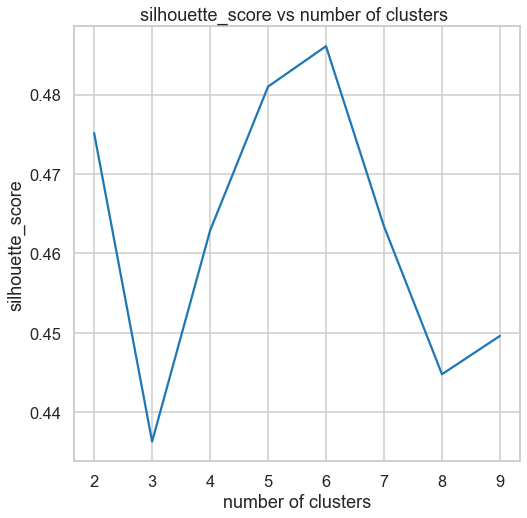

Number of clusters: 6
silhouette_score: 0.48609408962389006
[6 3 6 ... 2 4 5]


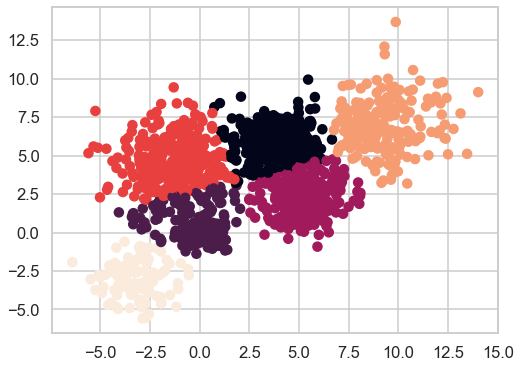

In [14]:
lst=[]
max_score=0
nk=0
for i in range(2,10):
    culstering = KMeans(n_clusters=i)
    clusters=culstering.fit(Multi_blob_Data)
    x=silhouette_score(Multi_blob_Data,culstering.predict(Multi_blob_Data))
    lst.append(x)
    if x > max_score:
        max_score=x
        nk=i
    print('silhouette_score at k=',i,':',x)



k=[2,3,4,5,6,7,8,9]
# plotting the points 
plt.plot(k, lst)
  
# naming the x axis
plt.xlabel('number of clusters')
# naming the y axis
plt.ylabel('silhouette_score')
  
# giving a title to my graph
plt.title('silhouette_score vs number of clusters ')
  
# function to show the plot
plt.show()

print('Number of clusters:',nk)
print('silhouette_score:',max_score)

plt.figure(figsize=(8, 6))
print(clusters.labels_)
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=KMeans(n_clusters=6, random_state= 5).fit(Multi_blob_Data).labels_.astype(float))


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

silhouette_score when affinity= euclidean and linkage = average 0.41478815574933364
silhouette_score when affinity= euclidean and linkage = single 0.08705564851389591
silhouette_score when affinity= manhattan and linkage = average 0.38029768112070367
silhouette_score when affinity= manhattan and linkage = single 0.08705564851389591
silhouette_score when affinity= cosine and linkage = average 0.2035575393889621
silhouette_score when affinity= cosine and linkage = single 0.07162243486315635
----------------------------------------------
Best silhouette_score: 0.41478815574933364
Linkage: average
Affinity: euclidean


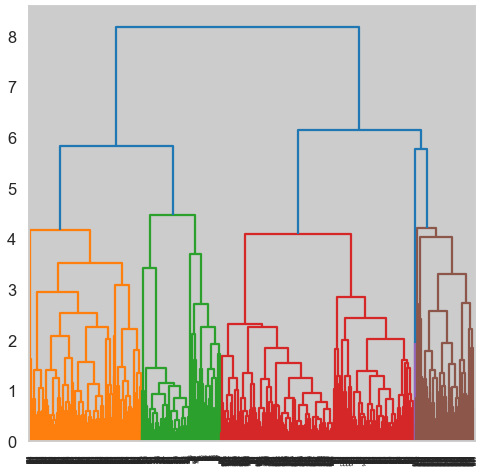

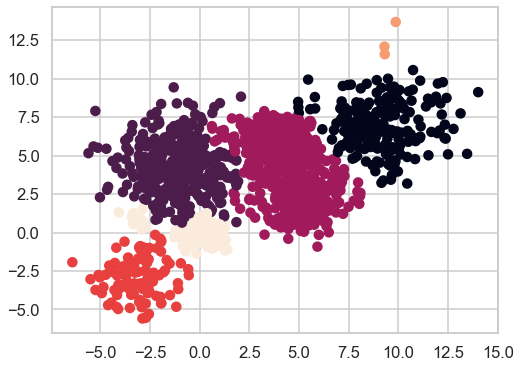

In [24]:
affinity= ['euclidean', 'manhattan', 'cosine']
linkage= ['average','single']
aff=''
link=''
max_score_Agg=0
for i in affinity :
    for j in linkage :
        Agg = AgglomerativeClustering(n_clusters=6,affinity= i,linkage=j)
        clusters_Agg = Agg.fit_predict(Multi_blob_Data)
        x1=silhouette_score(Multi_blob_Data , Agg.fit_predict(Multi_blob_Data))
        lst.append(x1)
        if x1 > max_score_Agg:
            aff=i
            link=j
            max_score_Agg=x1
        print('silhouette_score when affinity=',i,'and linkage =',j,x1)

print('----------------------------------------------')
print('Best silhouette_score:',max_score_Agg)
print('Linkage:',link)
print('Affinity:',aff)

dendro=sch.dendrogram(sch.linkage(Multi_blob_Data, method=link, metric=aff))

Agg = AgglomerativeClustering(n_clusters=6,affinity=aff ,linkage=link)
clusters_Agg_2 = Agg.fit(Multi_blob_Data)

plt.figure(figsize=(8, 6))
plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=clusters_Agg_2.labels_.astype(float))
#plt.figure(figsize=(8, 6))
#plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=clusters_Agg.labels_.astype(float))


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [57]:
EPS = np.arange(0.1, 3.1, 0.2)
Min_samples = np.arange(5,25,5)
minSamples
eps
max_score_DB=0
for i in EPS:
    for j in Min_samples :
        #clusteringDB = DBSCAN(eps=i, min_samples=j).fit(Multi_blob_Data)
        DB = DBSCAN(eps=i, min_samples=j)
        clusteringDB = DB.fit_predict(Multi_blob_Data)
        if len(set(DB.labels_)) == 1:
            print('none')
        else:
            x2 = silhouette_score(Multi_blob_Data,clusteringDB)
            if x2 > max_score_DB:
                max_score_DB=x2
                minSamples=j
                eps=i

            

        
print('----------------------------------------------')
print('Best silhouette_score:',max_score_DB)
print('eps:',eps)
print('min Samples:',minSamples)
        


#plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=clusteringDB.labels_.astype(float))


none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
----------------------------------------------
Best silhouette_score: 0.4685207355522043
eps: 2.1000000000000005
min Samples: 10


AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [58]:
gmm = GaussianMixture(n_components = 6)
cluster_gmm = gmm.fit(Multi_blob_Data)


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [70]:
from sklearn.datasets import load_iris
iris_data =load_iris()["data"]
#iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
#list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
iris_data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [61]:
data1 = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                     columns= iris_data['feature_names'] + ['target'])
data1.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [68]:
#Kmeans
lst=[]
max_score=0
nk=0
for i in range(2,10):
    culstering = KMeans(n_clusters=i)
    clusters=culstering.fit(iris_data)
    x=silhouette_score(iris_data,culstering.predict(iris_data))
    lst.append(x)
    if x > max_score:
        max_score=x
        nk=i
    print('silhouette_score at k=',i,':',x)

print('-----------------------------------------')

print('Number of clusters:',nk)
print('highest silhouette_score:',max_score)


silhouette_score at k= 2 : 0.681046169211746
silhouette_score at k= 3 : 0.5528190123564091
silhouette_score at k= 4 : 0.49745518901737446
silhouette_score at k= 5 : 0.4887488870931048
silhouette_score at k= 6 : 0.36598336415829047
silhouette_score at k= 7 : 0.3495863894562687
silhouette_score at k= 8 : 0.3519340715227998
silhouette_score at k= 9 : 0.3233941425230315
-----------------------------------------
Number of clusters: 2
highest silhouette_score: 0.681046169211746


In [74]:
#Hierarchal Clustering
affinity= ['euclidean', 'manhattan', 'cosine']
linkage= ['average','single']
aff=''
link=''
max_score_Agg=0
for i in affinity :
    for j in linkage :
        Agg = AgglomerativeClustering(n_clusters=3,affinity= i,linkage=j)
        clusters_Agg = Agg.fit_predict(iris_data)
        x1=silhouette_score(iris_data , Agg.fit_predict(iris_data))
        lst.append(x1)
        if x1 > max_score_Agg:
            aff=i
            link=j
            max_score_Agg=x1
        print('silhouette_score when affinity=',i,'and linkage =',j,x1)

Agg = AgglomerativeClustering(n_clusters=3,affinity=aff ,linkage=link)
clusters_Agg_2 = Agg.fit(iris_data)

print('----------------------------------------------')
print('Best silhouette_score:',max_score_Agg)
print('Linkage:',link)
print('Affinity:',aff)

silhouette_score when affinity= euclidean and linkage = average 0.5541608580282847
silhouette_score when affinity= euclidean and linkage = single 0.5121107753649304
silhouette_score when affinity= manhattan and linkage = average 0.5535372928319976
silhouette_score when affinity= manhattan and linkage = single 0.34029603418948795
silhouette_score when affinity= cosine and linkage = average 0.553807892204499
silhouette_score when affinity= cosine and linkage = single 0.553807892204499
----------------------------------------------
Best silhouette_score: 0.5541608580282847
Linkage: average
Affinity: euclidean


In [75]:
#DBscan

EPS = np.arange(0.1, 3.1, 0.2)
Min_samples = np.arange(5,25,5)
minSamples
eps
max_score_DB=0
for i in EPS:
    for j in Min_samples :
        #clusteringDB = DBSCAN(eps=i, min_samples=j).fit(Multi_blob_Data)
        DB = DBSCAN(eps=i, min_samples=j)
        clusteringDB = DB.fit_predict(iris_data)
        if len(set(DB.labels_)) == 1:
            print('none')
        else:
            x2 = silhouette_score(iris_data,clusteringDB)
            if x2 > max_score_DB:
                max_score_DB=x2
                minSamples=j
                eps=i

            

        
print('----------------------------------------------')
print('Best silhouette_score:',max_score_DB)
print('eps:',eps)
print('min Samples:',minSamples)
        



none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
----------------------------------------------
Best silhouette_score: 0.6867350732769776
eps: 0.9000000000000001
min Samples: 5


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 